In [22]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
data=pd.read_csv(r"Tiruchirappalli.csv")
del data['Unnamed: 0']

data.tail(5)

,No,Date,Weather,TempF,TempC,Humidity,Pressure,Location
541,541,2020-06-26,1,96,35,57,1004,Tiruchirappalli
542,542,2020-06-27,0,99,37,53,1005,Tiruchirappalli
543,543,2020-06-28,0,96,36,55,1004,Tiruchirappalli
544,544,2020-06-29,0,96,36,58,1004,Tiruchirappalli
545,545,2020-06-30,0,97,36,55,1004,Tiruchirappalli


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#date=scaler.fit(data["Date"].to_numpy())
weather=scaler.fit_transform(data["Weather"].to_numpy().reshape(-1, 1))
temp=scaler.fit_transform(data["TempF"].to_numpy().reshape(-1, 1))
hum=scaler.fit_transform(data["Humidity"].to_numpy().reshape(-1, 1))
pres=scaler.fit_transform(data["Pressure"].to_numpy().reshape(-1, 1))

In [25]:
dataset=[]
target=[]
for i in range(weather.shape[0]-1):
    dataset.append([weather[i][0],temp[i][0],hum[i][0],pres[i][0]])
    target.append(weather[i+1])
    


In [26]:
dataset

[[0.0, 0.1379310344827589, 0.5849056603773585, 0.9375],
 [0.0, 0.06896551724137945, 0.5849056603773585, 0.9375],
 [0.0, 0.1724137931034484, 0.6415094339622641, 1.0],
 [0.0, 0.1379310344827589, 0.6226415094339622, 0.9375],
 [0.0, 0.1724137931034484, 0.6415094339622641, 0.875],
 [0.0, 0.10344827586206895, 0.6981132075471698, 0.8125],
 [0.0, 0.2068965517241379, 0.660377358490566, 0.75],
 [0.0, 0.24137931034482785, 0.5660377358490566, 0.75],
 [0.0, 0.2068965517241379, 0.4716981132075472, 0.75],
 [0.0, 0.2068965517241379, 0.6037735849056604, 0.75],
 [0.0, 0.2068965517241379, 0.6981132075471698, 0.8125],
 [0.0, 0.2068965517241379, 0.660377358490566, 0.8125],
 [0.0, 0.2068965517241379, 0.6981132075471698, 0.75],
 [0.0, 0.24137931034482785, 0.6226415094339622, 0.75],
 [0.0, 0.24137931034482785, 0.5660377358490566, 0.75],
 [0.0, 0.24137931034482785, 0.5471698113207547, 0.8125],
 [0.0, 0.1724137931034484, 0.660377358490566, 0.75],
 [0.0, 0.2068965517241379, 0.6037735849056604, 0.75],
 [0.0, 0.24

In [27]:
d_set_train=dataset[:436]
target_train=target[1:437]
d_set_val=dataset[436:544]
target_val=target[437:545]


In [28]:

import numpy as np

data_gen = tf.keras.preprocessing.sequence.TimeseriesGenerator(d_set_train[0:-1], d_set_train[1:436],
                               length=10, sampling_rate=1,
                               batch_size=200)
val_gen=tf.keras.preprocessing.sequence.TimeseriesGenerator(d_set_val[0:-1], d_set_val[1:436],
                               length=10, sampling_rate=1,
                               batch_size=200)

In [29]:
batch_0 = data_gen[0]
x, y = batch_0

In [31]:
input1 = tf.keras.layers.Input((10, 4),name="weather")
lstm_1 = tf.keras.layers.LSTM(64,return_sequences=False)(input1)

output=tf.keras.layers.Dense(4,activation='linear')(lstm_1)

model = tf.keras.Model(inputs=[input1], outputs=output)
model.compile(optimizer="rmsprop", loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
weather (InputLayer)         [(None, 10, 4)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 17,924
Trainable params: 17,924
Non-trainable params: 0
_________________________________________________________________


In [32]:
path_checkpoint = "models\model_checkpoint.h5"
modelckpt_callback =tf.keras.callbacks.ModelCheckpoint(filepath='models/weather_Tiruchirappalli_model.{epoch:02d}-{val_loss:.2f}.h5',monitor="val_loss")
history = model.fit(data_gen,
    epochs=100,
    validation_data=val_gen,
    callbacks=[modelckpt_callback]
)

Epoch 1/100
3/3 [==============================] - 2s 531ms/step - loss: 0.3086 - val_loss: 0.1309
Epoch 2/100
3/3 [==============================] - 0s 57ms/step - loss: 0.1806 - val_loss: 0.0931
Epoch 3/100
3/3 [==============================] - 0s 66ms/step - loss: 0.1253 - val_loss: 0.0800
Epoch 4/100
3/3 [==============================] - 0s 60ms/step - loss: 0.1034 - val_loss: 0.0799
Epoch 5/100
3/3 [==============================] - 0s 58ms/step - loss: 0.0955 - val_loss: 0.0813
Epoch 6/100
3/3 [==============================] - 0s 54ms/step - loss: 0.0906 - val_loss: 0.0795
Epoch 7/100
3/3 [==============================] - 0s 58ms/step - loss: 0.0866 - val_loss: 0.0728
Epoch 8/100
3/3 [==============================] - 0s 57ms/step - loss: 0.0841 - val_loss: 0.0702
Epoch 9/100
3/3 [==============================] - 0s 55ms/step - loss: 0.0817 - val_loss: 0.0674
Epoch 10/100
3/3 [==============================] - 0s 57ms/step - loss: 0.0800 - val_loss: 0.0652
Epoch 11/100
3/3 [

Epoch 84/100
3/3 [==============================] - 0s 55ms/step - loss: 0.0576 - val_loss: 0.0629
Epoch 85/100
3/3 [==============================] - 0s 54ms/step - loss: 0.0602 - val_loss: 0.0600
Epoch 86/100
3/3 [==============================] - 0s 59ms/step - loss: 0.0582 - val_loss: 0.0601
Epoch 87/100
3/3 [==============================] - 0s 57ms/step - loss: 0.0581 - val_loss: 0.0609
Epoch 88/100
3/3 [==============================] - 0s 53ms/step - loss: 0.0584 - val_loss: 0.0608
Epoch 89/100
3/3 [==============================] - 0s 66ms/step - loss: 0.0576 - val_loss: 0.0749
Epoch 90/100
3/3 [==============================] - 0s 67ms/step - loss: 0.0587 - val_loss: 0.0595
Epoch 91/100
3/3 [==============================] - 0s 63ms/step - loss: 0.0588 - val_loss: 0.0596
Epoch 92/100
3/3 [==============================] - 0s 58ms/step - loss: 0.0576 - val_loss: 0.0596
Epoch 93/100
3/3 [==============================] - 0s 55ms/step - loss: 0.0588 - val_loss: 0.0650
Epoch 94/1

No handles with labels found to put in legend.


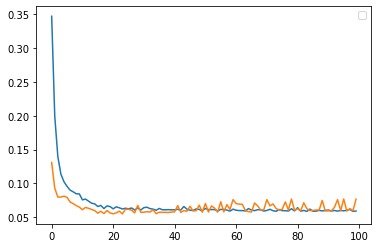

In [34]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.savefig("Tiruchirappalli.png")

In [35]:
d=np.array(dataset[535:545])

In [36]:
model=tf.keras.models.load_model(r"C:\Users\Asus\Desktop\Crop_Prediction_Using_Nutrients\ML\Weather_DL\Deep\models\weather_Tiruchirappalli_model.99-0.06.h5")

In [37]:
days=[]
for i in range(180):
    x=np.expand_dims(np.array(d), axis=0)
    arr=model.predict(x)
    #arr=np.random.rand(4)
    print(i)
    print(arr)
    for i in range(1,len(d)):
        d[i-1]=arr
    days.append(np.round(arr[0]))
    d[9]=arr

0
[[0.46032262 0.57325464 0.27542815 0.28667867]]
1
[[0.4063855  0.591103   0.2745621  0.32758695]]
2
[[0.38414067 0.60874254 0.27342534 0.35746068]]
3
[[0.37062243 0.62426764 0.27394214 0.3782345 ]]
4
[[0.36308122 0.63753426 0.27502292 0.3927358 ]]
5
[[0.3588459  0.6487121  0.27599514 0.40271732]]
6
[[0.3565379  0.6580672  0.2765356  0.40940508]]
7
[[0.35537052 0.6658681  0.2765631  0.41367087]]
8
[[0.35489702 0.67235667 0.2761212  0.41615492]]
9
[[0.35485268 0.67774224 0.2753038  0.41733742]]
10
[[0.3550738  0.6822031  0.274216   0.41758382]]
11
[[0.3554551  0.68588966 0.27295473 0.41717362]]
12
[[0.35592687 0.6889282  0.27160174 0.41632017]]
13
[[0.35644197 0.69142526 0.2702215  0.41518587]]
14
[[0.356968   0.6934703  0.26886296 0.4138922 ]]
15
[[0.357484   0.69513905 0.26756102 0.41252917]]
16
[[0.35797575 0.6964949  0.2663391  0.41116166]]
17
[[0.35843435 0.69759166 0.26521128 0.40983486]]
18
[[0.35885513 0.6984744  0.264185   0.40857917]]
19
[[0.35923633 0.699181   0.26326194 0.4

173
[[0.36165118 0.70149815 0.2575632  0.39935428]]
174
[[0.3616512  0.7014982  0.25756317 0.39935428]]
175
[[0.3616512  0.70149815 0.2575632  0.39935428]]
176
[[0.36165118 0.70149815 0.2575632  0.39935428]]
177
[[0.3616512  0.7014982  0.25756317 0.39935428]]
178
[[0.3616512  0.70149815 0.2575632  0.39935428]]
179
[[0.36165118 0.70149815 0.2575632  0.39935428]]


In [39]:
# Season Calculation:

#using threshold 20 % of 180 =36

days=[np.round(i[0]) for i in days]
rain_count=0
for day in days:
    if day==1:
        rain_count+=1
sun_count=180-rain_count

if(np.abs(sun_count-rain_count)>36):
    if sun_count>rain_count:
        print("Summer")
    else:
        print("Winter")
else:
    print("Monsoon")
   
   

Summer


[array([1., 1., 1., 0.], dtype=float32),
 array([1., 1., 1., 0.], dtype=float32),
 array([1., 1., 1., 0.], dtype=float32),
 array([1., 1., 1., 0.], dtype=float32),
 array([1., 1., 1., 0.], dtype=float32),
 array([1., 1., 1., 0.], dtype=float32),
 array([1., 1., 1., 0.], dtype=float32),
 array([1., 1., 1., 0.], dtype=float32),
 array([1., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., 1.], dtype=float32),
 array([0., 1., 0., 1.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 